<a href="https://colab.research.google.com/github/WoradeeKongthong/medical_cost_regression/blob/master/01_Medical_Cost_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
## import dataset

df = pd.read_csv('/content/drive/My Drive/life-long learning/MyProjects/Medical Cost/insurance.csv')

In [3]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
## Data cleansing

# checking column data type
print(df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [5]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [6]:
# change 'smoker' to boolean type
df['smoker'].replace(['no','yes'],[0,1], inplace=True)
df['smoker'] = df['smoker'].astype('bool')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,True,southwest,16884.92400
1,18,male,33.770,1,False,southeast,1725.55230
2,28,male,33.000,3,False,southeast,4449.46200
3,33,male,22.705,0,False,northwest,21984.47061
4,32,male,28.880,0,False,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,False,northwest,10600.54830
1334,18,female,31.920,0,False,northeast,2205.98080
1335,18,female,36.850,0,False,southeast,1629.83350
1336,21,female,25.800,0,False,southwest,2007.94500


In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker         bool
region       object
charges     float64
dtype: object

In [8]:
# checking missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   bool   
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: bool(1), float64(2), int64(2), object(2)
memory usage: 64.2+ KB


In [9]:
## Exploratory Data Analysis

# age
print('minimum_age :', df['age'].min(),'\nmaximum_age :',\
      df['age'].max(), '\nmean_age :', round(df['age'].mean(),2),'\nmode_age :', df['age'].mode()[0])

minimum_age : 18 
maximum_age : 64 
mean_age : 39.21 
mode_age : 18


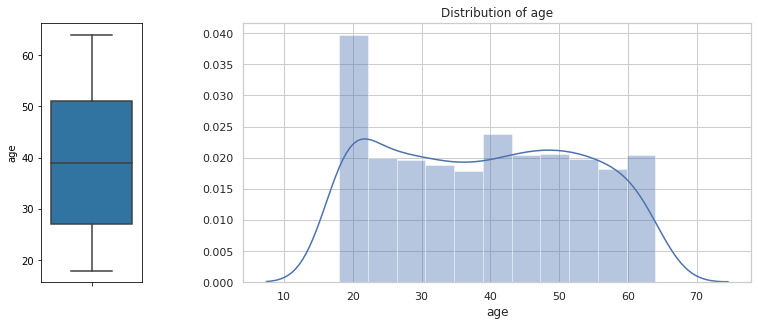

In [10]:
fig = plt.figure(figsize=(12,6))
spec = gridspec.GridSpec(ncols=2, nrows=1,width_ratios=[1, 5])

ax0 = fig.add_subplot(spec[0])
sns.boxplot(data=df, y='age')
sns.set(style="whitegrid")

ax1 = fig.add_subplot(spec[1])
sns.distplot(df['age'])
plt.title('Distribution of age')

fig.tight_layout(pad=5)
plt.show()

In [11]:
# gender
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [12]:
df['sex'].value_counts(normalize=True)

male      0.505232
female    0.494768
Name: sex, dtype: float64

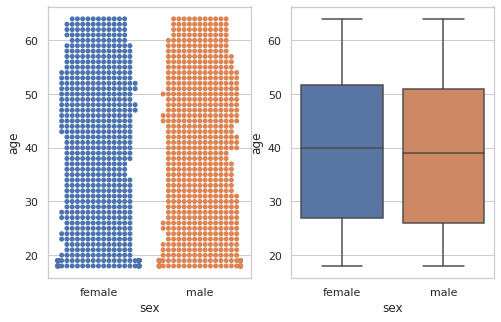

In [13]:
# sex and age
fig = plt.figure(figsize=(8,5))

ax0 = fig.add_subplot(121)
sns.swarmplot(data = df, x='sex', y='age')

ax1 = fig.add_subplot(122)
sns.boxplot(data = df, x='sex', y='age')

plt.show()

In [14]:
# children
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [15]:
df[df['children']==5]

,age,sex,bmi,children,smoker,region,charges
32,19,female,28.600,5,False,southwest,4687.79700
71,31,male,28.500,5,False,northeast,6799.45800
166,20,female,37.000,5,False,southwest,4830.63000
413,25,male,23.900,5,False,southwest,5080.09600
425,45,male,24.310,5,False,southeast,9788.86590
438,52,female,46.750,5,False,southeast,12592.53450
568,49,female,31.900,5,False,southwest,11552.90400
640,33,male,42.400,5,False,southwest,6666.24300
877,33,male,33.440,5,False,southeast,6653.78860
932,46,male,25.800,5,False,southwest,10096.97000


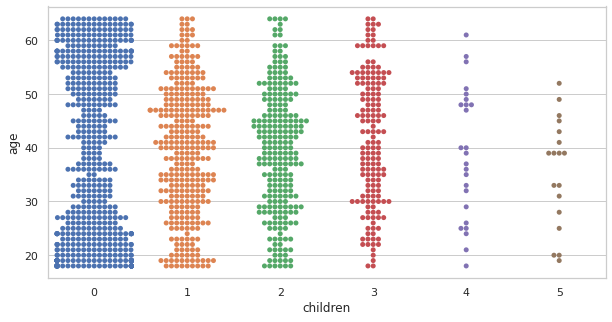

In [16]:
# children and age
fig = plt.figure(figsize=(10,5))
sns.swarmplot(data=df, x='children', y='age')
plt.show()

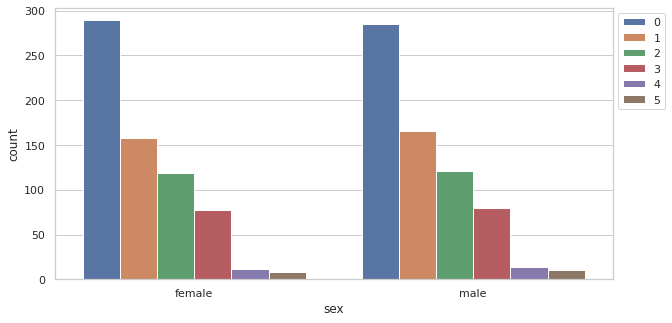

In [17]:
# childen and sex
fig = plt.figure(figsize = (10,5))
sns.countplot(data=df, x='sex', hue='children')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

In [18]:
# region
df['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [19]:
df.groupby(['region']).describe()

age                        ...       charges                         
           count       mean        std  ...           50%         75%          max
region                                  ...                                       
northeast  324.0  39.268519  14.069007  ...  10057.652025  16687.3641  58571.07448
northwest  325.0  39.196923  14.051646  ...   8965.795750  14711.7438  60021.39897
southeast  364.0  38.939560  14.164585  ...   9294.131950  19526.2869  63770.42801
southwest  325.0  39.455385  13.959886  ...   8798.593000  13462.5200  52590.82939

[4 rows x 32 columns]

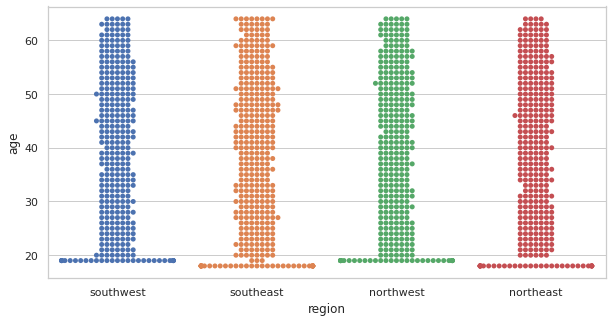

In [20]:
# region and age
fig = plt.figure(figsize=(10,5))
sns.swarmplot(data = df, x='region', y='age')

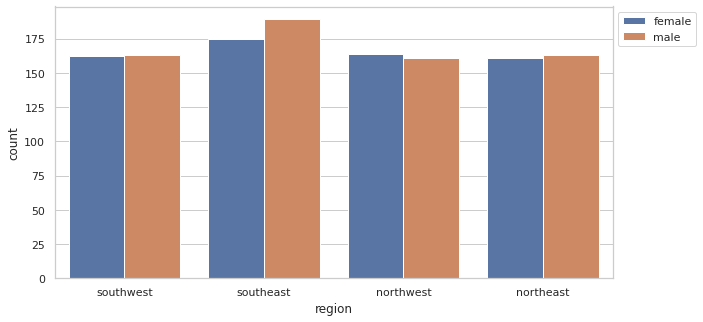

In [21]:
# region and sex
fig = plt.figure(figsize = (10,5))
sns.countplot(data=df, x='region', hue='sex')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

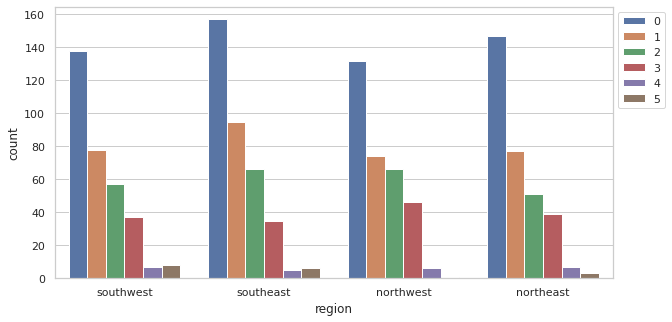

In [22]:
# region and children
fig = plt.figure(figsize = (10,5))
sns.countplot(data=df, x='region', hue='children')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

In [23]:
# smoker
df['smoker'].value_counts()

False    1064
True      274
Name: smoker, dtype: int64

In [24]:
# smoker and sex
female_smoker = ((df['sex']=='female')&(df['smoker']==True)).sum()
male_smoker = ((df['sex']=='male')&(df['smoker']==True)).sum()
print("female smoker : ", female_smoker)
print("male smoker : ", male_smoker)

female smoker :  115
male smoker :  159


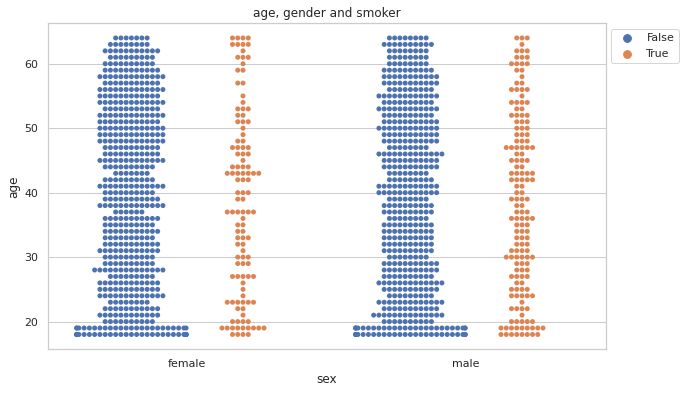

In [25]:
# smoker , gender and age
fig = plt.figure(figsize=(10,6))
sns.swarmplot(x = 'sex', y = 'age', data = df, hue='smoker', dodge=True)
plt.title('age, gender and smoker')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

In [26]:
# smoker and region
df.groupby(['region'])['smoker'].value_counts()

region     smoker
northeast  False     257
           True       67
northwest  False     267
           True       58
southeast  False     273
           True       91
southwest  False     267
           True       58
Name: smoker, dtype: int64

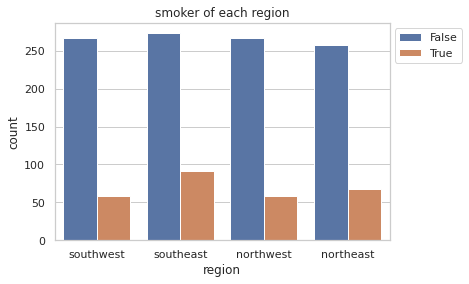

In [27]:
sns.countplot(data=df, x='region', hue='smoker')
plt.title('smoker of each region')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

In [0]:
# based on contingency table, there is no statistically significant difference in smoker among different regions. 
# (tested on http://vassarstats.net/newcs.html)

In [29]:
# bmi
df['bmi_status']=''
df['bmi_status'][df['bmi']<18.5] = 'underweight'
df['bmi_status'][(df['bmi']>=18.5) & (df['bmi']<25)] = 'ideal'
df['bmi_status'][(df['bmi']>=25) & (df['bmi']<30)] = 'overweight'
df['bmi_status'][df['bmi']>=30] = 'obesity'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

In [30]:
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_status
0,19,female,27.900,0,True,southwest,16884.92400,overweight
1,18,male,33.770,1,False,southeast,1725.55230,obesity
2,28,male,33.000,3,False,southeast,4449.46200,obesity
3,33,male,22.705,0,False,northwest,21984.47061,ideal
4,32,male,28.880,0,False,northwest,3866.85520,overweight


In [31]:
df['bmi_status'].isna().sum()

0

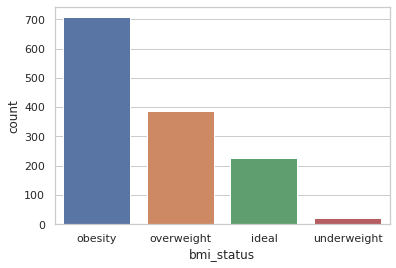

In [32]:
sns.countplot(data=df, x='bmi_status', order=['obesity','overweight','ideal','underweight'])
plt.show()

In [33]:
df['bmi_status'].value_counts(normalize=True)

obesity        0.528401
overweight     0.288490
ideal          0.168161
underweight    0.014948
Name: bmi_status, dtype: float64

In [34]:
df[df['bmi'] == df['bmi'].max()]

,age,sex,bmi,children,smoker,region,charges,bmi_status
1317,18,male,53.13,0,False,southeast,1163.4627,obesity


In [35]:
df[df['bmi'] == df['bmi'].min()]

,age,sex,bmi,children,smoker,region,charges,bmi_status
172,18,male,15.96,0,False,northeast,1694.7964,underweight


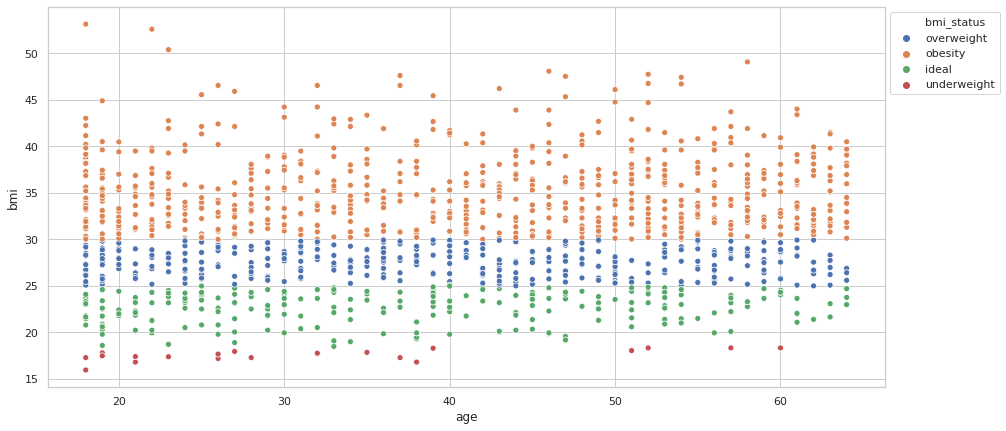

In [36]:
# bmi and age
fig = plt.figure(figsize=(15,7))
sns.scatterplot(data=df, x='age', y='bmi', hue='bmi_status')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

In [0]:
# bmi and age group
bins = pd.IntervalIndex.from_tuples([(15, 25), (25, 45), (45, 70)])
df['AgeInterval'] = pd.cut(df['age'],bins)

In [38]:
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_status,AgeInterval
0,19,female,27.900,0,True,southwest,16884.92400,overweight,"(15, 25]"
1,18,male,33.770,1,False,southeast,1725.55230,obesity,"(15, 25]"
2,28,male,33.000,3,False,southeast,4449.46200,obesity,"(25, 45]"
3,33,male,22.705,0,False,northwest,21984.47061,ideal,"(25, 45]"
4,32,male,28.880,0,False,northwest,3866.85520,overweight,"(25, 45]"


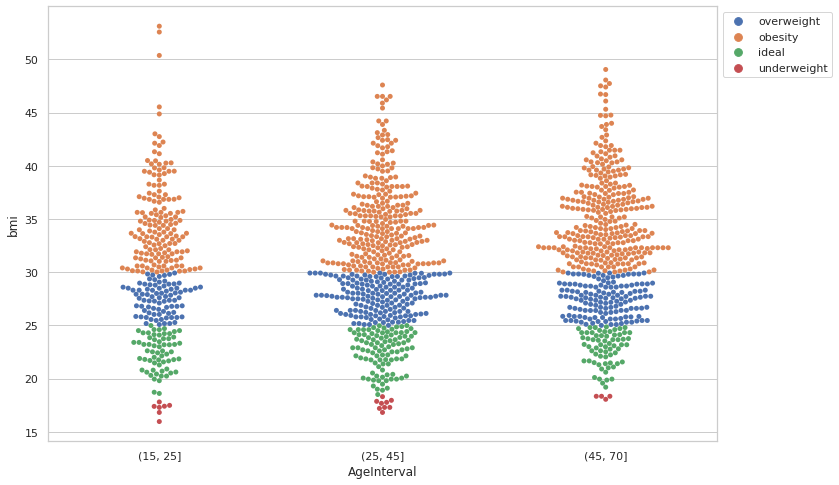

In [39]:
fig = plt.figure(figsize=(12,8))
sns.swarmplot(data=df, x='AgeInterval', y='bmi', hue='bmi_status')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

<Figure size 864x432 with 0 Axes>

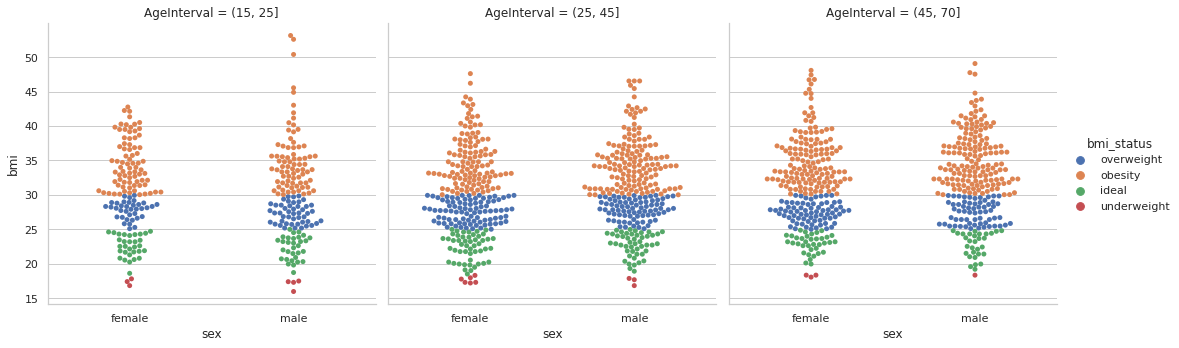

In [40]:
# bmi, age interval, and gender
fig = plt.figure(figsize=(12,6))
sns.catplot(data=df, col='AgeInterval', y='bmi', x='sex',hue = 'bmi_status', kind='swarm')
plt.show()

In [41]:
# charges
df[df['charges'] == df['charges'].min()]

,age,sex,bmi,children,smoker,region,charges,bmi_status,AgeInterval
940,18,male,23.21,0,False,southeast,1121.8739,ideal,"(15, 25]"


In [42]:
df[df['charges'] == df['charges'].max()]

,age,sex,bmi,children,smoker,region,charges,bmi_status,AgeInterval
543,54,female,47.41,0,True,southeast,63770.42801,obesity,"(45, 70]"


In [43]:
df.sort_values('charges')[::-1].head(10)

,age,sex,bmi,children,smoker,region,charges,bmi_status,AgeInterval
543,54,female,47.410,0,True,southeast,63770.42801,obesity,"(45, 70]"
1300,45,male,30.360,0,True,southeast,62592.87309,obesity,"(25, 45]"
1230,52,male,34.485,3,True,northwest,60021.39897,obesity,"(45, 70]"
577,31,female,38.095,1,True,northeast,58571.07448,obesity,"(25, 45]"
819,33,female,35.530,0,True,northwest,55135.40209,obesity,"(25, 45]"
1146,60,male,32.800,0,True,southwest,52590.82939,obesity,"(45, 70]"
34,28,male,36.400,1,True,southwest,51194.55914,obesity,"(25, 45]"
1241,64,male,36.960,2,True,southeast,49577.66240,obesity,"(45, 70]"
1062,59,male,41.140,1,True,southeast,48970.24760,obesity,"(45, 70]"
488,44,female,38.060,0,True,southeast,48885.13561,obesity,"(25, 45]"


In [44]:
df.sort_values('charges').head(10)

,age,sex,bmi,children,smoker,region,charges,bmi_status,AgeInterval
940,18,male,23.21,0,False,southeast,1121.8739,ideal,"(15, 25]"
808,18,male,30.14,0,False,southeast,1131.5066,obesity,"(15, 25]"
1244,18,male,33.33,0,False,southeast,1135.9407,obesity,"(15, 25]"
663,18,male,33.66,0,False,southeast,1136.3994,obesity,"(15, 25]"
22,18,male,34.10,0,False,southeast,1137.0110,obesity,"(15, 25]"
194,18,male,34.43,0,False,southeast,1137.4697,obesity,"(15, 25]"
866,18,male,37.29,0,False,southeast,1141.4451,obesity,"(15, 25]"
781,18,male,41.14,0,False,southeast,1146.7966,obesity,"(15, 25]"
442,18,male,43.01,0,False,southeast,1149.3959,obesity,"(15, 25]"
1317,18,male,53.13,0,False,southeast,1163.4627,obesity,"(15, 25]"


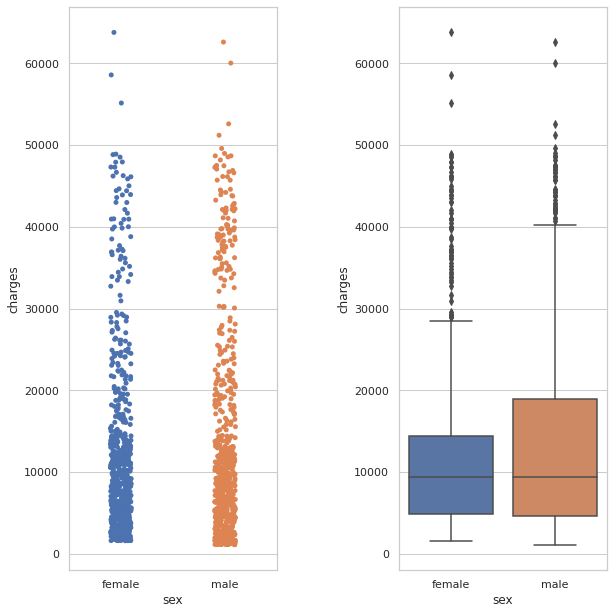

In [45]:
# charge and sex
fig = plt.figure(figsize=(10,10))

ax0 = fig.add_subplot(121)
sns.stripplot(data=df, y='charges', x='sex')

ax1 = fig.add_subplot(122)
sns.boxplot(data=df, y='charges', x='sex')

fig.tight_layout(pad=5)
plt.show()

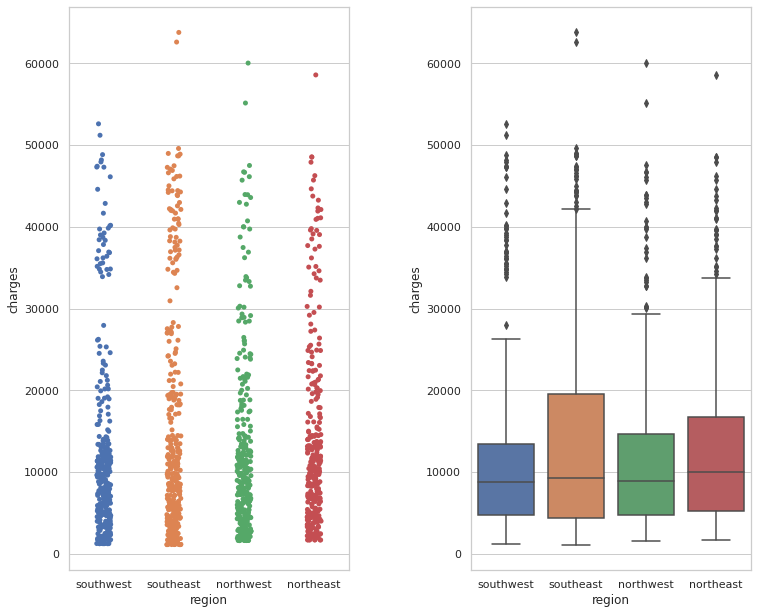

In [46]:
# charge and region
fig = plt.figure(figsize=(12,10))

ax0 = fig.add_subplot(121)
sns.stripplot(data=df, y='charges', x='region')

ax1 = fig.add_subplot(122)
sns.boxplot(data=df, y='charges', x='region')

fig.tight_layout(pad=5)
plt.show()

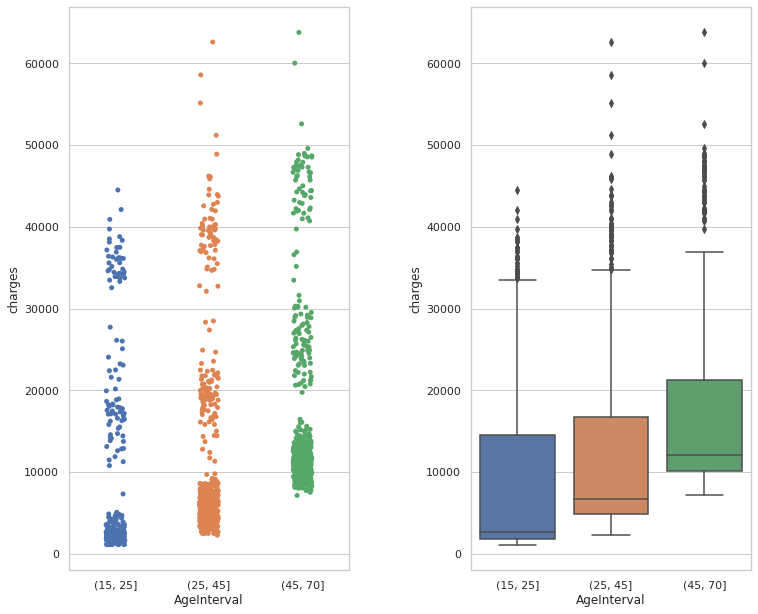

In [47]:
# charge and age interval
fig = plt.figure(figsize=(12,10))

ax0 = fig.add_subplot(121)
sns.stripplot(data=df, y='charges', x='AgeInterval')

ax1 = fig.add_subplot(122)
sns.boxplot(data=df, y='charges', x='AgeInterval')

fig.tight_layout(pad=5)
plt.show()

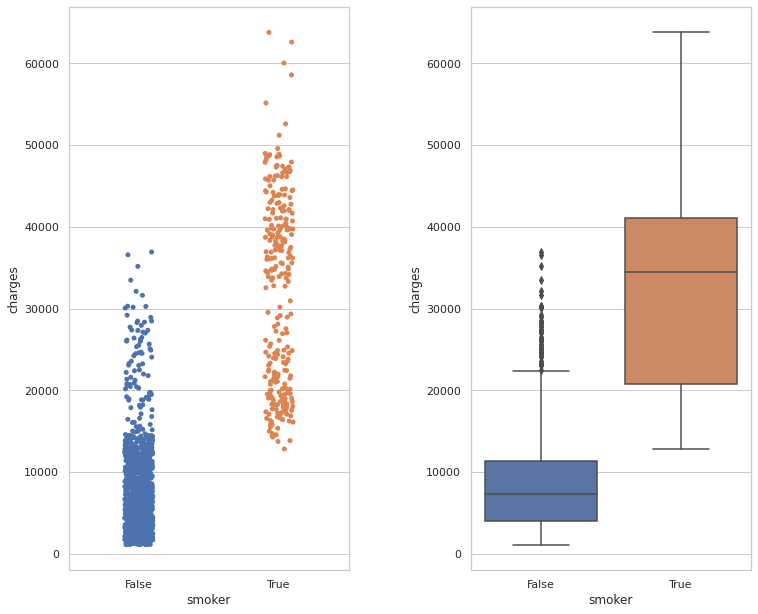

In [48]:
# charge and smoker
fig = plt.figure(figsize=(12,10))

ax0 = fig.add_subplot(121)
sns.stripplot(data=df, y='charges', x='smoker')

ax1 = fig.add_subplot(122)
sns.boxplot(data=df, y='charges', x='smoker')

fig.tight_layout(pad=5)
plt.show()

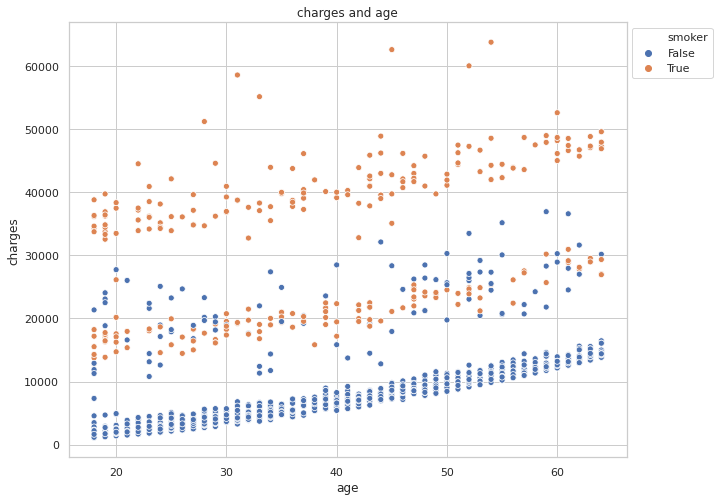

In [49]:
# charges, age and smoker
fig = plt.figure(figsize=(10,8))
sns.scatterplot(x = 'age', y = 'charges', hue= 'smoker', data = df)
plt.title('charges and age')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

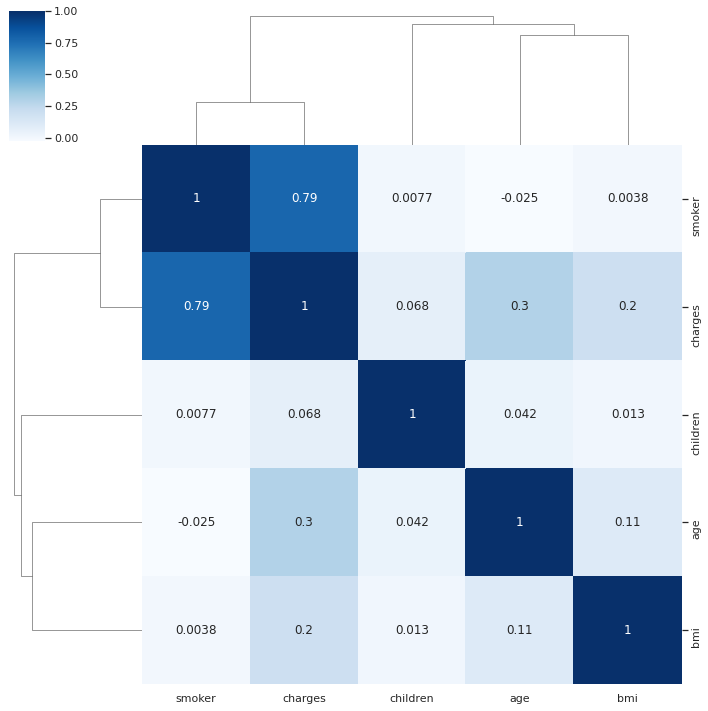

In [50]:
# Correlation
df_corr = df.corr()
sns.clustermap(df_corr, cmap='Blues', annot=True)
plt.show()

In [51]:
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_status,AgeInterval
0,19,female,27.900,0,True,southwest,16884.92400,overweight,"(15, 25]"
1,18,male,33.770,1,False,southeast,1725.55230,obesity,"(15, 25]"
2,28,male,33.000,3,False,southeast,4449.46200,obesity,"(25, 45]"
3,33,male,22.705,0,False,northwest,21984.47061,ideal,"(25, 45]"
4,32,male,28.880,0,False,northwest,3866.85520,overweight,"(25, 45]"


In [0]:
df.to_csv('/content/drive/My Drive/life-long learning/MyProjects/Medical Cost/cleaned_insurance.csv', index=False)